In [6]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
df_fin2 = pd.read_csv('../../data/df_fin2.csv')
df_fin2.shape

(806367, 32)

# 1. 단일 구매자 vs 반복 구매자

## 1-1. 고객 수 기준

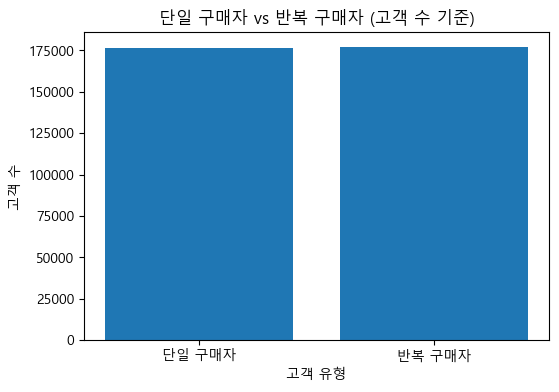

In [ ]:
# 고객별 구매 횟수
cust_purchase_cnt = (
    df_fin2
    .groupby('customer_id')
    .size()
    .reset_index(name='purchase_cnt')
)

# 단일 / 반복 구매자 구분
cust_purchase_cnt['buyer_type'] = cust_purchase_cnt['purchase_cnt'].apply(
    lambda x: '단일 구매자' if x == 1 else '반복 구매자'
)

# 고객 수 집계
buyer_cnt = (
    cust_purchase_cnt
    .groupby('buyer_type')
    .size()
    .reset_index(name='customer_cnt')
)

plt.figure(figsize=(6,4))
plt.bar(buyer_cnt['buyer_type'], buyer_cnt['customer_cnt'])
plt.title('단일 구매자 vs 반복 구매자 (고객 수 기준)')
plt.ylabel('고객 수')
plt.xlabel('고객 유형')
plt.show()

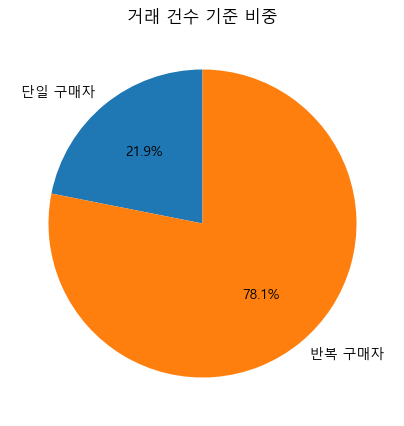

In [10]:
# 고객 유형을 원본 거래 데이터에 붙이기
df_with_type = df_fin2.merge(
    cust_purchase_cnt[['customer_id', 'buyer_type']],
    on='customer_id',
    how='left'
)

# 거래 건수 기준 집계
transaction_cnt = (
    df_with_type
    .groupby('buyer_type')
    .size()
    .reset_index(name='transaction_cnt')
)

# plt.figure(figsize=(6,4))
# plt.bar(transaction_cnt['buyer_type'], transaction_cnt['transaction_cnt'])
# plt.title('단일 구매자 vs 반복 구매자 (거래 건수 기준)')
# plt.ylabel('거래 건수')
# plt.xlabel('고객 유형')
# plt.show()
plt.figure(figsize=(5,5))
plt.pie(
    transaction_cnt['transaction_cnt'],
    labels=transaction_cnt['buyer_type'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('거래 건수 기준 비중')
plt.show()

# 2. 반복 구매자 특징

channel,오프라인,온라인
buyer_type,,
단일 구매자,39.60,60.40
반복 구매자,28.09,71.91


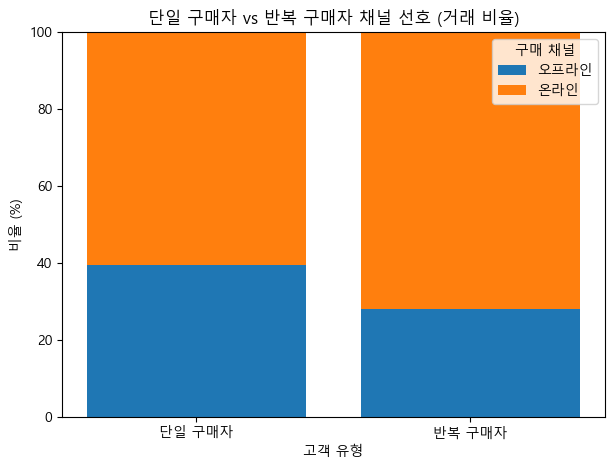

In [11]:
# 거래 건수 집계
channel_ratio = (
    df_with_type
    .groupby(['buyer_type', 'channel'])
    .size()
    .reset_index(name='cnt')
)

# 고객 유형별 합계
channel_ratio['pct'] = (
    channel_ratio['cnt']
    / channel_ratio.groupby('buyer_type')['cnt'].transform('sum')
    * 100
)

# 시각화를 위한 pivot
channel_pivot = channel_ratio.pivot(
    index='buyer_type',
    columns='channel',
    values='pct'
)

channel_pivot = channel_pivot.round(2)
display(channel_pivot)

plt.figure(figsize=(7,5))

bottom = None
for channel in channel_pivot.columns:
    plt.bar(
        channel_pivot.index,
        channel_pivot[channel],
        bottom=bottom,
        label=channel
    )
    bottom = channel_pivot[channel] if bottom is None else bottom + channel_pivot[channel]

plt.title('단일 구매자 vs 반복 구매자 채널 선호 (거래 비율)')
plt.ylabel('비율 (%)')
plt.xlabel('고객 유형')
plt.legend(title='구매 채널')
plt.ylim(0, 100)
plt.show()
